## 환경설정

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import missingno as msno
import plotly.express as px
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

In [4]:
ab_test = pd.read_csv('data/ab_test_daily.csv')

In [5]:
ab_test

,Date,Total Users,Group,Applied,Apply Rate
0,2024-01-01,32,A,2,0.0625
1,2024-01-01,40,B,3,0.0750
2,2024-01-02,333,A,24,0.0721
3,2024-01-02,318,B,18,0.0566
4,2024-01-03,329,A,28,0.0851
5,2024-01-03,340,B,15,0.0441
6,2024-01-04,322,A,27,0.0839
7,2024-01-04,303,B,23,0.0759
8,2024-01-05,324,A,20,0.0617
9,2024-01-05,320,B,15,0.0469


In [6]:
# A, B그룹으로 분리
A_df = ab_test.query('Group == "A"')
B_df = ab_test.query('Group == "B"')

In [8]:
A_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 58
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         30 non-null     object 
 1   Total Users  30 non-null     int64  
 2   Group        30 non-null     object 
 3   Applied      30 non-null     int64  
 4   Apply Rate   30 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.4+ KB


In [9]:
B_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1 to 59
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         30 non-null     object 
 1   Total Users  30 non-null     int64  
 2   Group        30 non-null     object 
 3   Applied      30 non-null     int64  
 4   Apply Rate   30 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.4+ KB


In [10]:
A_df.describe()

,Total Users,Applied,Apply Rate
count,30.000000,30.000000,30.000000
mean,234.300000,18.000000,0.076783
std,84.105496,6.792491,0.012401
min,32.000000,2.000000,0.057200
25%,189.000000,14.250000,0.067850
50%,243.000000,18.000000,0.075400
75%,311.000000,22.750000,0.084800
max,338.000000,28.000000,0.098200


In [11]:
B_df.describe()

,Total Users,Applied,Apply Rate
count,30.000000,30.000000,30.000000
mean,236.366667,11.933333,0.049960
std,81.957299,5.368705,0.013201
min,40.000000,1.000000,0.016100
25%,188.500000,8.000000,0.043425
50%,242.000000,11.000000,0.050600
75%,300.500000,15.000000,0.055525
max,342.000000,23.000000,0.075900


## EDA

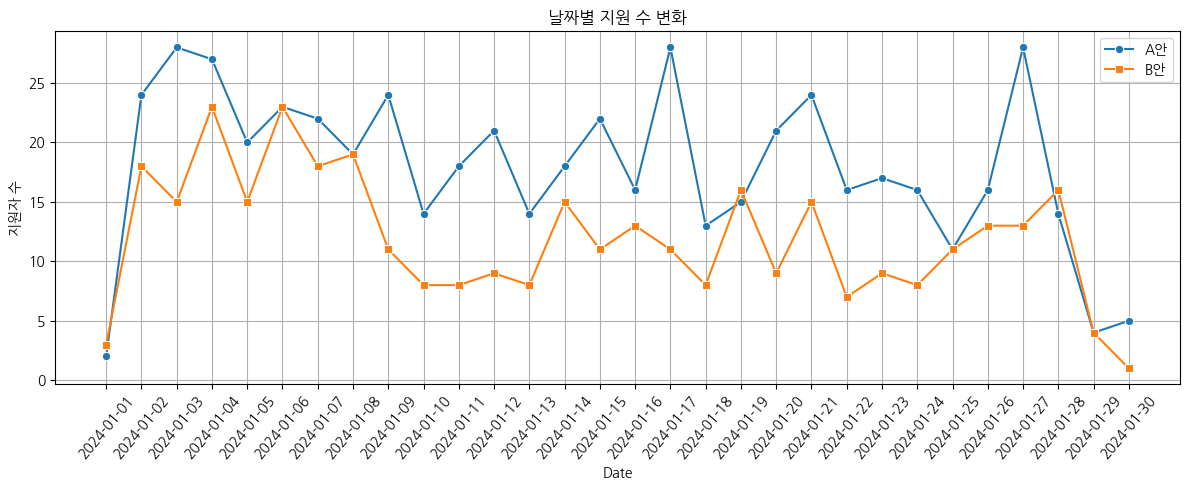

In [ ]:
# 시간별 1개월 지원자 수 시각화
fig, ax = plt.subplots(figsize=(12, 5))

sns.lineplot(data=A_df, x='Date', y='Applied', marker='o', label='A안')
sns.lineplot(data=B_df, x='Date', y='Applied', marker='s', label='B안')
ax.set_title('날짜별 지원 수 변화')
ax.set_ylabel('지원자 수')
ax.tick_params(axis='x', rotation=50)
ax.grid(True)
ax.legend()
fig.tight_layout()
plt.show()

- A안과 B안 사이의 지원자 수 확인 시 대체로 실험군인 A안이 지원율이 높은 것으로 확인되었습니다.

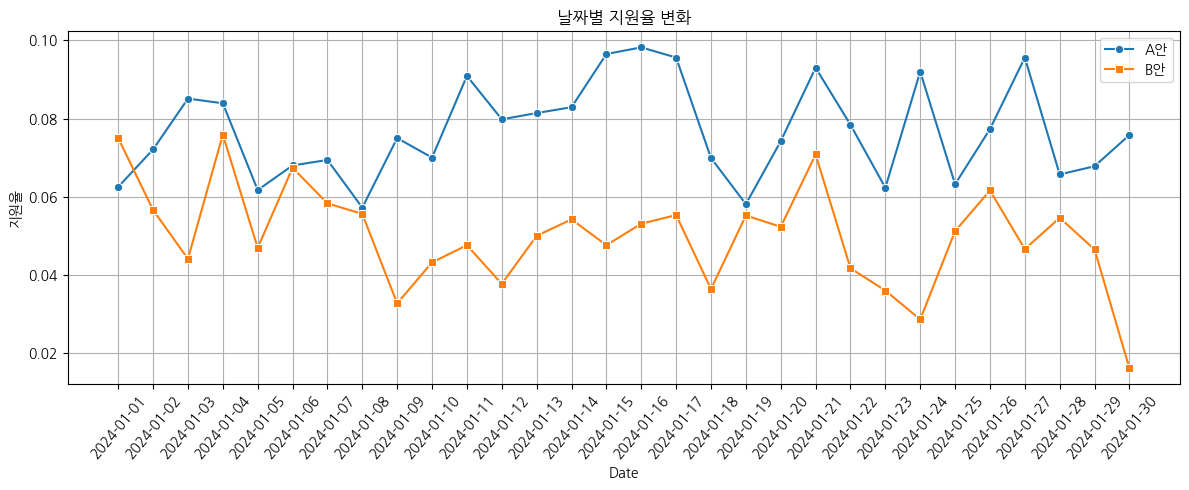

In [21]:
# 시간별 1개월 지원율 시각화
fig, ax = plt.subplots(figsize=(12, 5))

sns.lineplot(data=A_df, x='Date', y='Apply Rate', marker='o', label='A안')
sns.lineplot(data=B_df, x='Date', y='Apply Rate', marker='s', label='B안')
ax.set_title('날짜별 지원율 변화')
ax.set_ylabel('지원율')
ax.tick_params(axis='x', rotation=50)
ax.grid(True)
ax.legend()
fig.tight_layout()
plt.show()

In [28]:
# 실험군과 대조군 간 전환율 Z검정
applied_count = [A_df['Applied'].sum() , B_df['Applied'].sum()]
group_count = [A_df['Total Users'].sum(), B_df['Total Users'].sum()]

z_stats, p_value = proportions_ztest(applied_count, group_count, alternative='two-sided')

print(f'Z-점수: {z_stats:.3f}')
print(f'p-value: {p_value:.5f}')

if p_value < 0.05:
    print('두 그룹 지원율의 차이는 통계적으로 유의미합니다.')
else:
    print('두 그룹 지원율의 차이는 통계적으로 유의미하지 않습니다.')

Z-점수: 6.412
p-value: 0.00000
두 그룹 지원율의 차이는 통계적으로 유의미합니다.
